# Lab 9: Searching

## <font color=DarkRed>Your Exercise: Recursive Binary Search without List Slicing</font>

The binary search algorithm in the textbook uses Python list slicing as part of the recursive divide-and-conquer approach it uses to solve the searching problem.

This is inefficient, as a new copy of the original input list is made at each recursive call. Albeit, the new list is reduced in size by $~alist//2$ each time `binary_search` is recursively executed.

Replace the use of list slicing with a technique that eliminates the unnecessary list copying. Recall that you will need to pass the list along with the starting and ending index values for the sublist. 

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

I provide you the code for recursive binary search, as found in the textbook. Use this code as the basis for your solution.

In [6]:
def binary_search(alist, item, first=0, last=None):
    if last is None:
        last=len(alist)-1
    else:
        last=last
    if len(alist) == 0:
        return False 
    elif first<=last:
        midpoint = (first+last)//2     
        if alist[midpoint]==item:
            return True
        else:
            if item < alist[midpoint]:
                return binary_search(alist, item, first=first, last=midpoint-1)
            else:
                return binary_search(alist, item, first=midpoint+1, last=last)
    else:
        return False
    
    


In [7]:
def binary_search2(alist, item):
    if len(alist) == 0:
        return False
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
            return True
        else:
            if item < alist[midpoint]:
                return binary_search2(alist[:midpoint], item)
            else:
                return binary_search2(alist[midpoint+1:], item)

## Testing

Generate a random, ordered list of integers and do a quick benchmark analysis to confim the $O(log_2(n))$ complexity of this algorithm after the change. Some timings and a simple plot should suffice. *Remember: binary search **requires** a sorted list for searching!*

In [8]:
import time
import matplotlib.pyplot as plt

In [9]:
# Simple test. Do more below...
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(binary_search(testlist, 2))
print(binary_search(testlist, 3))

True
False


In [48]:
N = []
for i in range(10000,50000,200):
    N.append(i)

In [49]:
binary_time=[]
for r in N:
    alist = range(r)
    item = 40000
    start = time.perf_counter()
    binary_search(alist, item)
    end = time.perf_counter()
    binary_time.append(end-start)
    
binary_time2=[]
for r in N:
    alist = range(r)
    item = 40000
    start = time.perf_counter()
    binary_search2(alist, item)
    end = time.perf_counter()
    binary_time2.append(end-start)



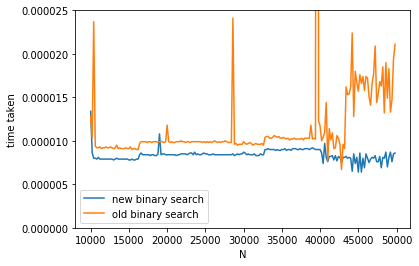

In [50]:
plt.plot(N, binary_time, label = 'new binary search' )
plt.plot(N, binary_time2, label = 'old binary search' )
plt.legend()
plt.ylabel('time taken')
plt.ylim(0,0.000025)
plt.xlabel('N')
plt.show()